# Telco Customer Churn

<b> Context: </b>

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

<b>Content:</b>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

# Metadata


<ul>
<li> customerID : Customer ID </li>

<li> gender: Whether the customer is a male or a female</li>

<li> SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)</li>

<li> Partner: Whether the customer has a partner or not (Yes, No)</li>

<li> Dependents: Whether the customer has dependents or not (Yes, No)</li>

<li> tenure: Number of months the customer has stayed with the company</li>

<li> PhoneService: Whether the customer has a phone service or not (Yes, No)</li>

<li> MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)</li>

<li> InternetService: Customer’s internet service provider (DSL, Fiber optic, No)</li>

<li> OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)</li>

<li> OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)</li>

<li> DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)</li>

<li> TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)</li>

<li> StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)</li>

<li> StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)</li>

<li> Contract: The contract term of the customer (Month-to-month, One year, Two year)</li>

<li> PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)</li>

<li> PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li>

<li> MonthlyCharges: The amount charged to the customer monthly</li>

<li> TotalCharges: The total amount charged to the customer</li>

<li> Churn: Whether the customer churned or not (Yes or No)</li>

</ul>

# Data Loading

In [13]:
#Importing libraries
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
plotly.offline.plot()

NameError: name 'plotly' is not defined

In [4]:
telcom = pd.read_csv('Downloads/Telco-Customer-Churn.csv')

In [5]:
print('The Shape of the Dataset is ',telcom.shape)
print('\n The Columns of the Dataset : ',telcom.columns)

The Shape of the Dataset is  (7043, 21)

 The Columns of the Dataset :  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
telcom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [7]:
telcom = telcom[telcom.TotalCharges != " "]
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

for i in [ 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies'] : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})  

# Exploratory Data Analysis

We now check the balance of the response variable i.e Churn :

In [8]:
telcom.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

We do have more categorical features as compared to continuous features. We take a look at the various categories in each feature.

In [9]:
columns_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

for col in columns_list:
    print('\n Attribute : ',col,'\n')
    print(telcom[col].value_counts())


 Attribute :  gender 

Male      3549
Female    3483
Name: gender, dtype: int64

 Attribute :  SeniorCitizen 

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

 Attribute :  Partner 

No     3639
Yes    3393
Name: Partner, dtype: int64

 Attribute :  Dependents 

No     4933
Yes    2099
Name: Dependents, dtype: int64

 Attribute :  PhoneService 

Yes    6352
No      680
Name: PhoneService, dtype: int64

 Attribute :  MultipleLines 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

 Attribute :  InternetService 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

 Attribute :  OnlineSecurity 

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

 Attribute :  OnlineBackup 

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

 Attribute :  DeviceProtection 

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

 Attribute :  TechSupport 

No     4992
Yes 

In [10]:
#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]


def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [14]:
lab = telcom["Churn"].value_counts().keys().tolist()
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,hoverinfo = "label+value+text",hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data"))

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [15]:
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

# Key Takeaways

<ol>
    
<li>Gender is equally distributed for churn and non churn customers. </li>

<li>Majority of Customers donot fall in Seniority Age Group. Senior Churn Customers are more as compared to Non Churn senior Customers.</li>

<li>Being a Partner isnt too nuch of a factor for churning customers.</li>

<li>Majority of Dependent Customers have high risk of Churn.</li>

<li>Phone Service and Multiple Lines Distribution doesnt seem  a critical feature in deciding customer churn.</li>

<li>Majority of Churned Customers had opted for fiber optics, so we might need to further investigate on this feature.</li>

<li>There are chances churn customers are not happy with Online Security and Electronic Check Payment services</li>

<li>Month to Month Contract Customers have shown higher chances (~90%) of churning.</li>

<li>Streaming Movies, Streaming TV, Device Protection,Online Backup aint much of a factor.</li>

</ol>

In [70]:
#scatter plot monthly charges & total charges by churn group
def plot_churncharges_scatter(churn,color) :
    tracer = go.Scatter(x = telcom[telcom["Churn"] == churn]["MonthlyCharges"],
                        y = telcom[telcom["Churn"] == churn]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = "Churn - " + churn,
                        opacity = .9
                       )
    return tracer

trace_yes = plot_churncharges_scatter("Yes","red")
trace_no = plot_churncharges_scatter("No","blue")

data2   = [trace_no,trace_yes]

#layout
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    return layout

layout2  = layout_title("Monthly Charges & Total Charges by Churn group")
fig2 = go.Figure(data = data2,layout = layout2)
py.iplot(fig2)


We could see that when the monthly charges are more, customer churn out more. The density of non churn customers is more when the total charges is less.

In [71]:
telcom['Churn']=telcom['Churn'].replace({'No': 0, 'Yes': 1})

We use Chi Square Test to check the correlation between Categorical Features and Binary Response.

In [72]:
for x in  [ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'PaperlessBilling']:
    
    print('==========Chi Square Test for ',x,' and Churn ==========')
    
    contingency_table=pd.crosstab(telcom[x],telcom["Churn"])

    Observed_Values = contingency_table.values 

    #Expected Values
    import scipy.stats
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)

#or
#df=b[2]
#Significance Level 5%
    alpha=0.05

#chi-square statistic - χ2
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]

#critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)


#p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)



#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables - Churn and ",x)
    else:
        print("Retain H0,There is no relationship between 2 categorical variables - Churn and ",x)
    
    print("\n")
    #if p_value<=alpha:
     #   print("Reject H0,There is a relationship between 2 categorical variables")
    #else:
     #   print("Retain H0,There is no relationship between 2 categorical variables")

==========Chi Square Test for  Partner  and Churn ==========
Reject H0,There is a relationship between 2 categorical variables - Churn and  Partner


==========Chi Square Test for  Dependents  and Churn ==========
Reject H0,There is a relationship between 2 categorical variables - Churn and  Dependents


==========Chi Square Test for  PhoneService  and Churn ==========
Retain H0,There is no relationship between 2 categorical variables - Churn and  PhoneService


==========Chi Square Test for  MultipleLines  and Churn ==========
Reject H0,There is a relationship between 2 categorical variables - Churn and  MultipleLines


==========Chi Square Test for  OnlineSecurity  and Churn ==========
Reject H0,There is a relationship between 2 categorical variables - Churn and  OnlineSecurity


==========Chi Square Test for  OnlineBackup  and Churn ==========
Reject H0,There is a relationship between 2 categorical variables - Churn and  OnlineBackup


==========Chi Square Test for  DeviceProtection

For the Continuous Features, we use Correlation Matrix to find out the correlation:

In [73]:
telcom[['MonthlyCharges', 'TotalCharges','tenure']].corr()

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651065,0.246862
TotalCharges,0.651065,1.000000,0.825880
tenure,0.246862,0.825880,1.000000


There exists strong correlation between Total Charges and Monthly Charges. So ideally we should either remove one of them or we introduce a interaction term. However as of now, we keep this for future reference.

The distribution of Total/Monthly Charges looks skewed both for Churn and Non-Churn Customers from the below KDE plot:

Text(0.5, 1.0, 'Distribution of total charges by churn')

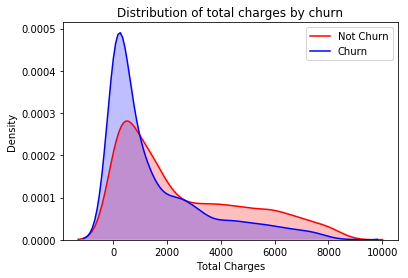

In [74]:
ax = sns.kdeplot(telcom.TotalCharges[(telcom["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(telcom.TotalCharges[(telcom["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

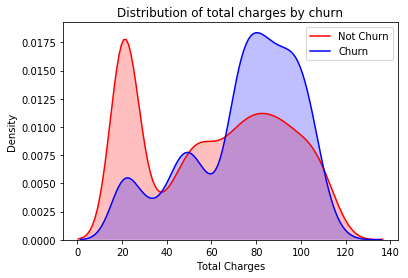

In [75]:
ax = sns.kdeplot(telcom.MonthlyCharges[(telcom["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(telcom.MonthlyCharges[(telcom["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Model Building (Logistic Regression)

In [76]:
telcom_dummies = telcom
#telcom_dummies['SeniorCitizen']=telcom_dummies['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
telcom_dummies = pd.get_dummies(telcom_dummies,columns=['SeniorCitizen','gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

telcom_dummies.drop('customerID', axis=1, inplace=True)

y = telcom_dummies['Churn']
telcom_dummies.drop('Churn', axis=1, inplace=True)
X = telcom_dummies

Let's have a look at our features and response dataframes:

In [77]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'gender_Female', 'gender_Male', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction_test).ravel()
print('True Negatives : ' , tn)
print('False Positive : ' , fp)
print('False Negatives : ' , fn)
print('True Positive : ' , tp)
print ('Accuracy : ',  100 * metrics.accuracy_score(y_test, prediction_test))

True Negatives :  1423
False Positive :  157
False Negatives :  247
True Positive :  283
Accuracy :  80.85308056872039


AxesSubplot(0.125,0.125;0.775x0.755)


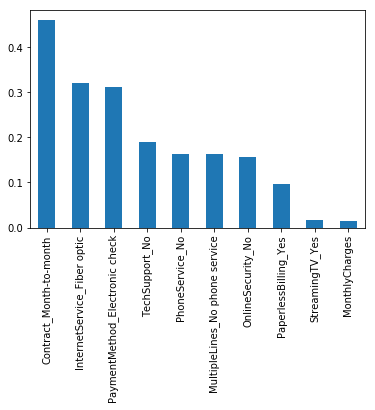

In [81]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

# Conclusion

We can see that Contract Type specifically Month-to-Month Contract, Fibre Optic Internet Service and Electronic Check payment Method and Tech Support are key deciding factors in determing the Customer Churn.


We can try below to improve accuracy:
1. Introducing Interaction Terms
2. Advanced ML Algorithms (Decison Trees, Random Forest, Xtreme Gradient Boosting) to get more accurate Customer Churn predictions and important features.